<a href="https://colab.research.google.com/github/MuneerHussain01/Machine-Learning-Projects/blob/main/FAI2324_99_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Python Project: Wonderful Wines of the World (WWW)


Members:

- Name


# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Loading Dataset

In [3]:
# Defining sheet name for sheet 1 having data of 2000 customers
sheet_name = 'Mail'
# Read the Excel file
data = pd.read_excel(r'/content/FAI2324_WWW_Database.xls', sheet_name=sheet_name)

In [4]:
print(data.head())

   Custid  Dayswus  Age  Edu  Income  Freq  Recency  Monetary  Spcork
0    1005     1062   59   18   91852    25       26      1138       1
1    1014      619   35   18   57997     5       28        81       0
2    1015     1133   32   20   50289     1      231        20       0
3    1017      624   22   16   20043     2       37        16       0
4    1018      940   76   15  112765    39       72      2039       0


In [5]:
# Defining Attributes and Target Attribute
attributes = ['Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary']
target = 'Spcork'
X = data[attributes]
y = data[target]
print(len(X))

2000


# Exporing & Understanding Data

### Missing Values

In [6]:
data.isna().sum()

Custid      0
Dayswus     0
Age         0
Edu         0
Income      0
Freq        0
Recency     0
Monetary    0
Spcork      0
dtype: int64

### Data Description

In [7]:
print(data.describe())

             Custid      Dayswus          Age          Edu        Income  \
count   2000.000000  2000.000000  2000.000000  2000.000000    2000.00000   
mean    6035.071500   895.896000    47.527500    16.751500   69622.93600   
std     2893.338035   203.690587    17.562701     1.897511   27901.30086   
min     1005.000000   550.000000    18.000000    12.000000   10000.00000   
25%     3540.500000   724.750000    33.000000    15.000000   47013.75000   
50%     5961.500000   893.500000    48.000000    17.000000   69335.00000   
75%     8596.250000  1069.000000    63.000000    18.000000   92510.00000   
max    11000.000000  1249.000000    78.000000    20.000000  140628.00000   

              Freq      Recency     Monetary       Spcork  
count  2000.000000  2000.000000  2000.000000  2000.000000  
mean     14.508500    63.516500   618.746500     0.072500  
std      12.098104    75.553894   653.578237     0.259379  
min       1.000000     0.000000     8.000000     0.000000  
25%       4.000

### Distribution Of Values

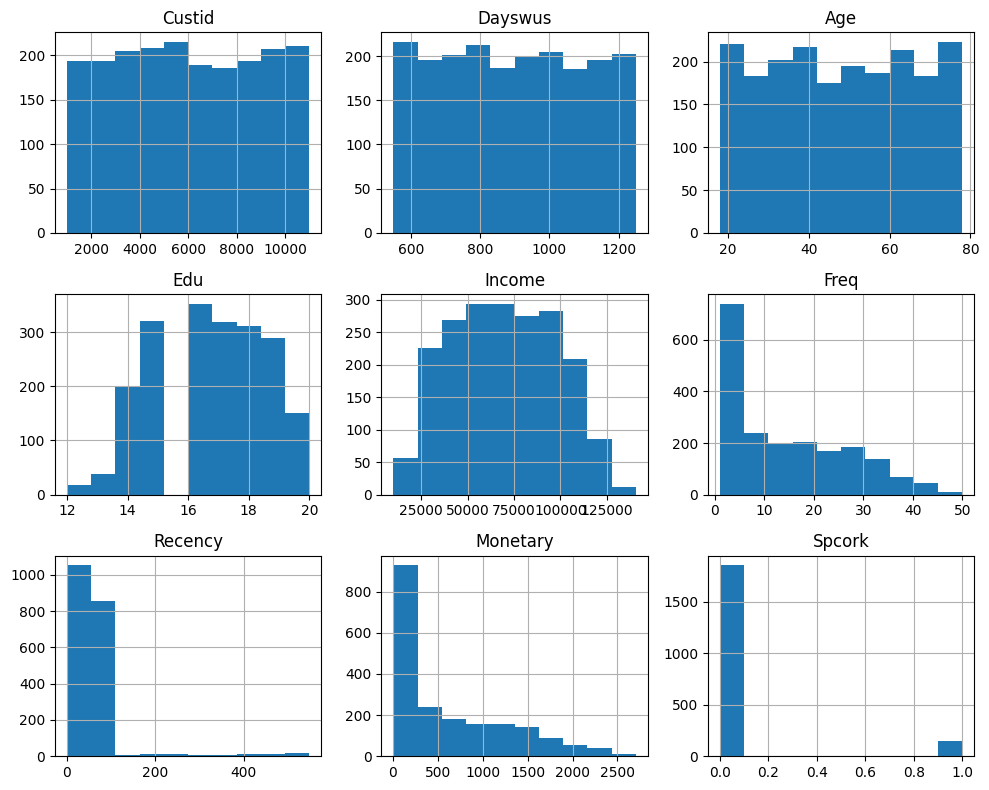

In [8]:
# Plot histograms for numerical variables
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Outliers

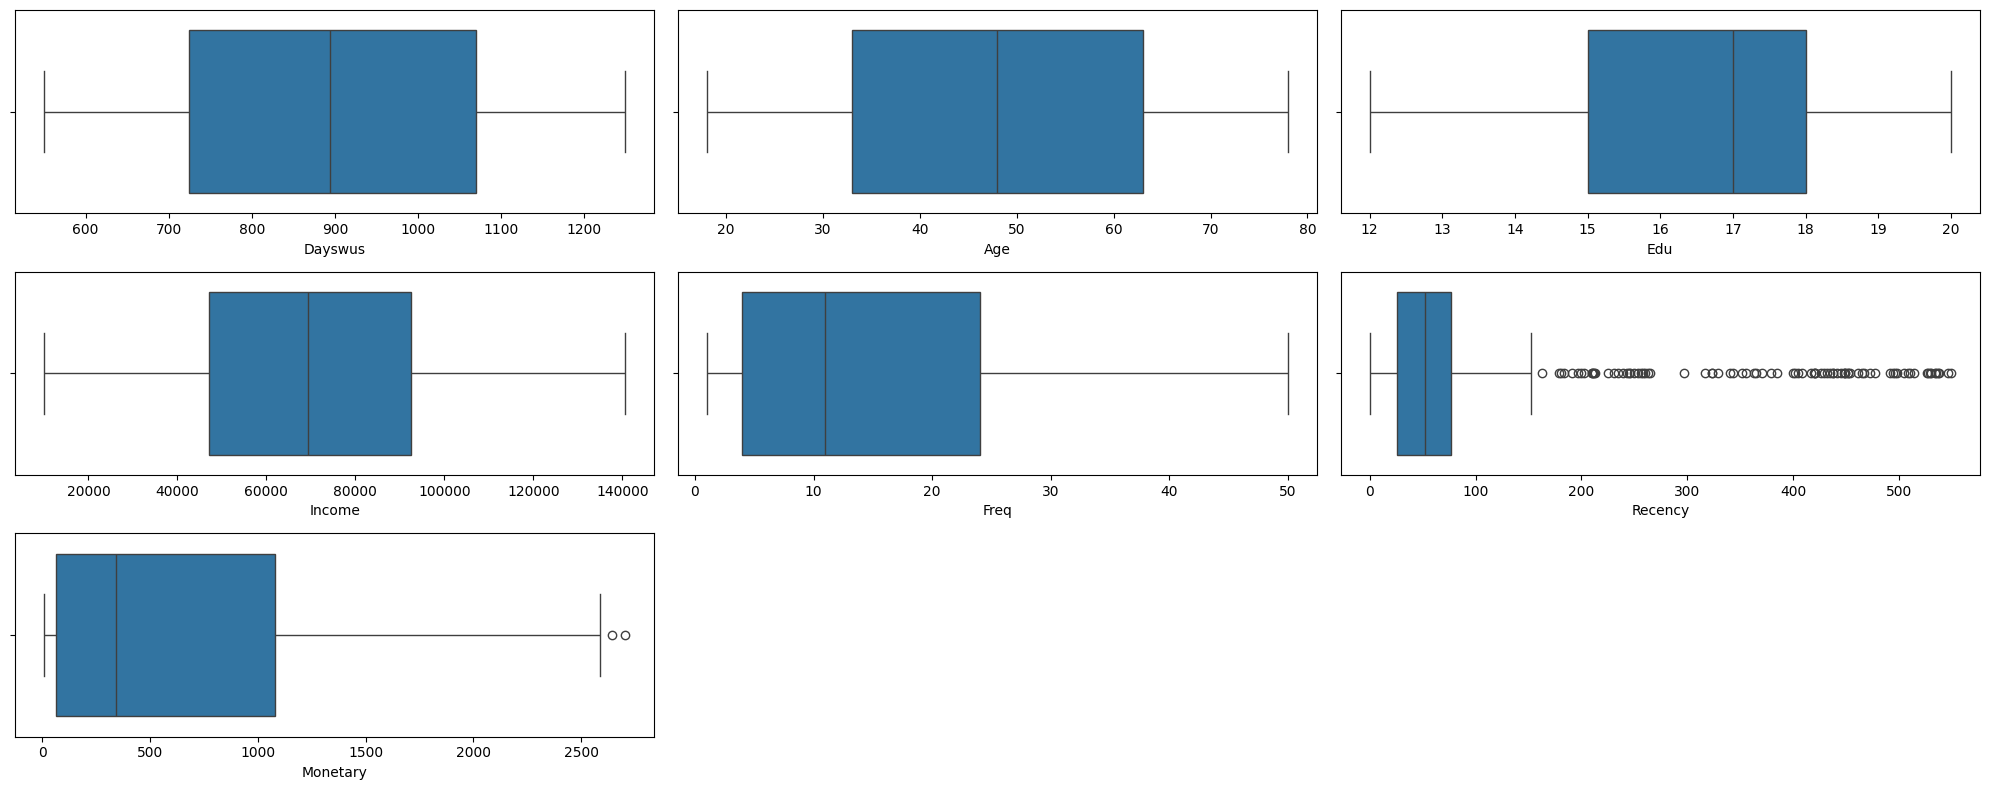

In [9]:
# Plot box plots for each attribute
plt.figure(figsize=(20, 8))
for i, attribute in enumerate(attributes):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[attribute])
    plt.xlabel(attribute)
plt.tight_layout()
plt.show()

# Data Preprocessing

### Removing Outliers

In [10]:
# Define a function to remove outliers using IQR method
def remove_outliers(df, attribute):
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[attribute] >= lower_bound) & (df[attribute] <= upper_bound)]
    return df

# Remove outliers for each attribute
for attribute in attributes:
    data = remove_outliers(data, attribute)

# Reset index after removing outliers
data = data.reset_index(drop=True)

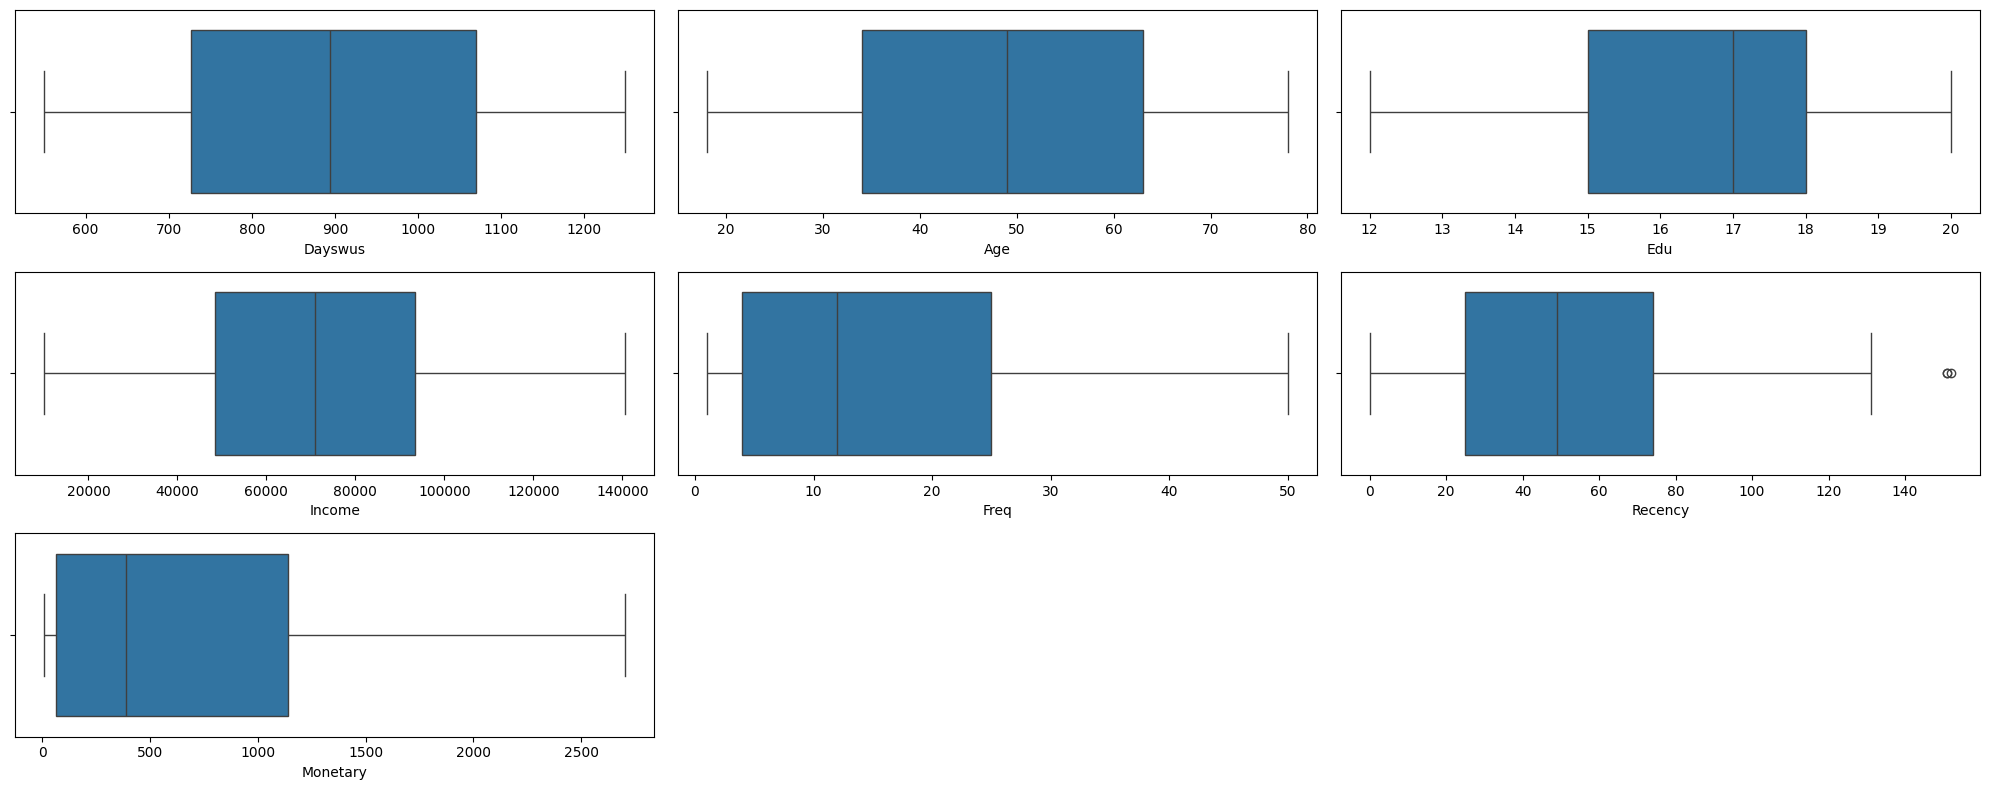

In [11]:
plt.figure(figsize=(20, 8))
for i, attribute in enumerate(attributes):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=data[attribute])
    plt.xlabel(attribute)
plt.tight_layout()
plt.show()

### Feature Selection

In [12]:
# Select the features and target variable
X = data.drop('Spcork', axis=1)
y = data['Spcork']

# Perform feature selection
estimator = LogisticRegression()
k = 5  # Number of top features to select
selector = RFE(estimator, n_features_to_select=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.support_].tolist()
print('Selected Features:', selected_features)

Selected Features: ['Age', 'Edu', 'Freq', 'Recency', 'Monetary']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Slpitting Data

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model  for Customer Likelihood

In [14]:
# Create a pipeline with data preprocessing and logistic regression model
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
# Train the logistic regression model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Peformance Measures

### Accuracy

In [15]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9190600522193212


### Precision, Recall, and F1-score:

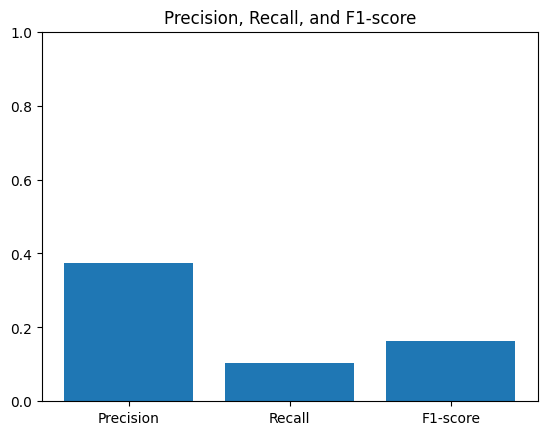

In [16]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot precision, recall, and F1-score
plt.bar(['Precision', 'Recall', 'F1-score'], [precision, recall, f1])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1-score')
plt.show()

### ROC Curve

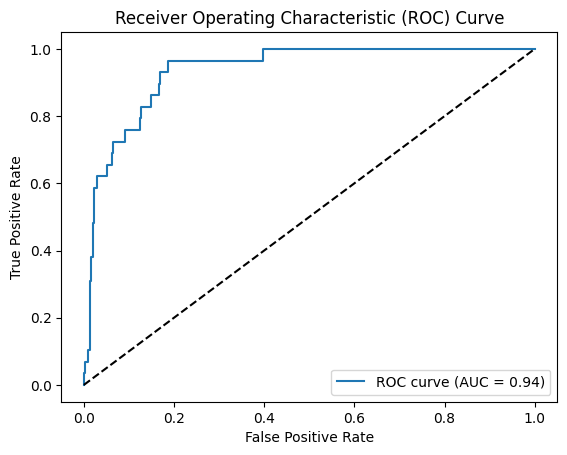

In [17]:
# Calculate the probabilities of the positive class
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Decision Tree Model

In [18]:
# Train the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions using the decision tree model
dt_predictions = dt_model.predict(X_test)

### Accuracy

In [19]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9007832898172323


### Precision Recall

In [20]:
# Calculate the precision
precision = precision_score(y_test, dt_predictions)

# Calculate the recall
recall = recall_score(y_test, dt_predictions)

# Calculate the probabilities for the positive class
dt_probabilities = dt_model.predict_proba(X_test)[:, 1]

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.3448275862068966
Recall: 0.3448275862068966


### ROC Curve

# Prediction on Customers file

In [27]:
# Defining sheet name for sheet 2 having data of 8000 customers
sheet_name = 'BD'
# Read the Excel file
new_data = pd.read_excel(r'/content/FAI2324_WWW_Database.xls', sheet_name=sheet_name)
attributes = ['Custid','Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary']
new_X = new_data[attributes]
predictions = pipeline.predict(new_X)

### Counting Buyers and Non Buyers Prediction on new data

In [28]:
# Create a DataFrame with customer IDs and predictions
predictions_df = pd.DataFrame({'Custid': new_data['Custid'], 'Prediction': predictions})

# Count the number of buyers and non-buyers
buyer_count = predictions_df[predictions_df['Prediction'] == 1].shape[0]
non_buyer_count = predictions_df[predictions_df['Prediction'] == 0].shape[0]

# Print the counts
print("Total number of buyers:", buyer_count)
print("Total number of non-buyers:", non_buyer_count)

Total number of buyers: 136
Total number of non-buyers: 7864


### Saving CSC File

In [30]:
# Save the DataFrame to a CSV file
predictions_df.to_csv('FAI2223_99_Prediction.csv', index=False)

# Clustering Model for Customer Segmentation

### Data Exploration

In [31]:
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset, attribute types, and missing values

   Custid  Dayswus  Age  Edu  Income  Freq  Recency  Monetary  Spcork
0    1005     1062   59   18   91852    25       26      1138       1
1    1014      619   35   18   57997     5       28        81       0
2    1017      624   22   16   20043     2       37        16       0
3    1018      940   76   15  112765    39       72      2039       0
4    1022     1108   19   13   43392     5        4       118       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Custid    1914 non-null   int64
 1   Dayswus   1914 non-null   int64
 2   Age       1914 non-null   int64
 3   Edu       1914 non-null   int64
 4   Income    1914 non-null   int64
 5   Freq      1914 non-null   int64
 6   Recency   1914 non-null   int64
 7   Monetary  1914 non-null   int64
 8   Spcork    1914 non-null   int64
dtypes: int64(9)
memory usage: 134.7 KB
None


### Scaling and Standerizing Features

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Determining Number Of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

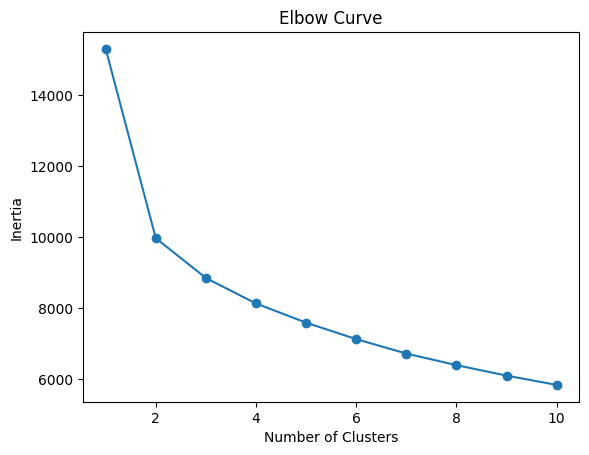

In [33]:
# Use the elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [34]:
# Initialize and fit the K-means clustering model with the chosen number of clusters
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

### Cluster Labels

3    217
1    206
8    203
5    199
6    192
4    188
9    185
2    180
7    173
0    171
Name: count, dtype: int64


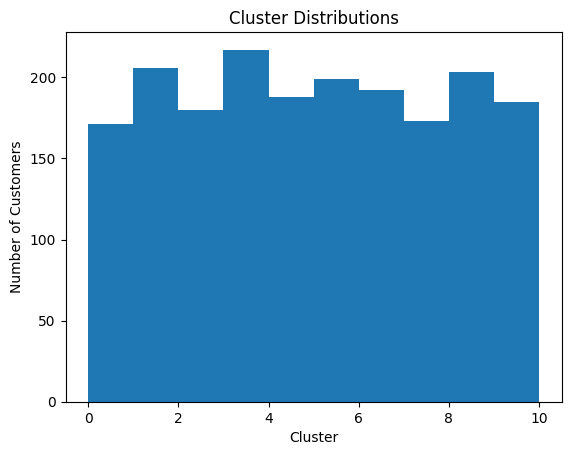

In [35]:
# Extract the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Calculate the number of customers in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts()
print(cluster_counts)

# Visualize the cluster distributions
plt.hist(cluster_labels, bins=range(10 + 1))
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Cluster Distributions')
plt.show()

### Exploring Cluster Profile

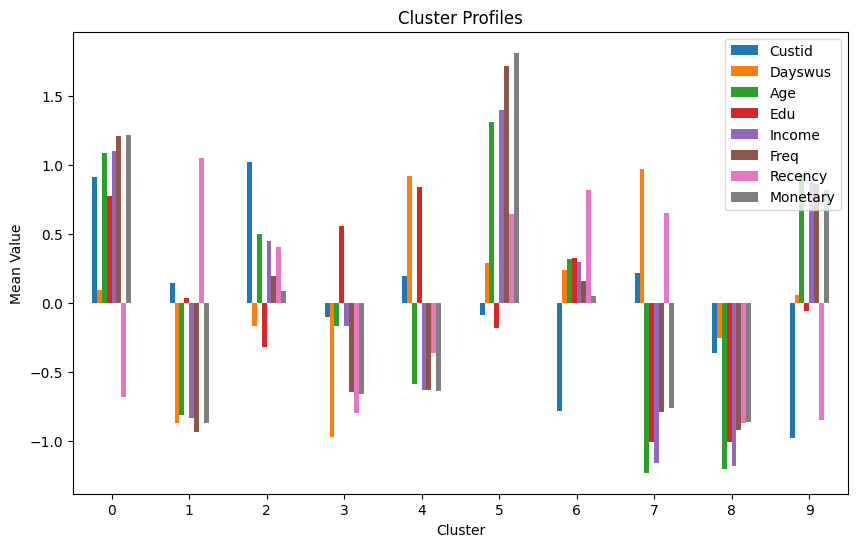

In [38]:
# Create a DataFrame with the selected features
selected_features_df = pd.DataFrame(X, columns=['Custid','Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary'])

# Add the cluster labels to the DataFrame
selected_features_df['Cluster'] = cluster_labels

# Calculate the cluster profiles
cluster_profiles = selected_features_df.groupby('Cluster').mean()

# Visualize cluster profiles as bar charts
cluster_profiles.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Cluster Profiles')
plt.xticks(rotation=0)
plt.show()

# Visualize cluster centers in 2D or 3D feature space
if X.shape[1] == 2:
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=100)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Cluster Centers')
    plt.show()
elif X.shape[1] == 3:
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_labels, cmap='viridis')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
               marker='x', color='red', s=100)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Cluster Centers')
    plt.show()


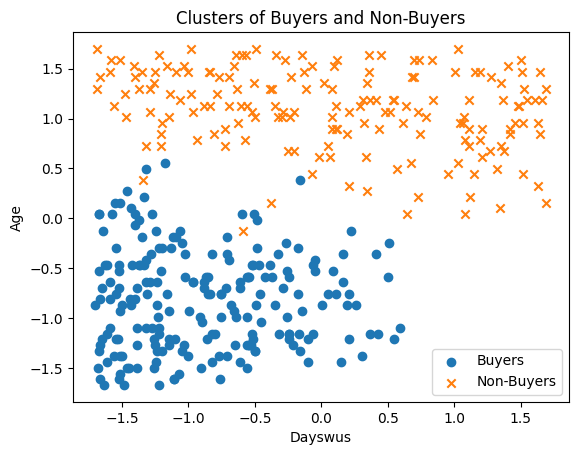

In [39]:
# Create a DataFrame with the selected features
selected_features_df = pd.DataFrame(X, columns=['Custid','Dayswus', 'Age', 'Edu', 'Income', 'Freq', 'Recency', 'Monetary'])

# Add the cluster labels to the DataFrame
selected_features_df['Cluster'] = cluster_labels

# Separate the customers who bought and did not buy the corkscrew
buyers = selected_features_df[selected_features_df['Cluster'] == 1]
non_buyers = selected_features_df[selected_features_df['Cluster'] == 0]

# Visualize the clusters of buyers and non-buyers
plt.scatter(buyers['Dayswus'], buyers['Age'], marker='o', label='Buyers')
plt.scatter(non_buyers['Dayswus'], non_buyers['Age'], marker='x', label='Non-Buyers')
plt.xlabel('Dayswus')
plt.ylabel('Age')
plt.title('Clusters of Buyers and Non-Buyers')
plt.legend()
plt.show()

### Exploring Buyers and Non Buyers depending on each attribute

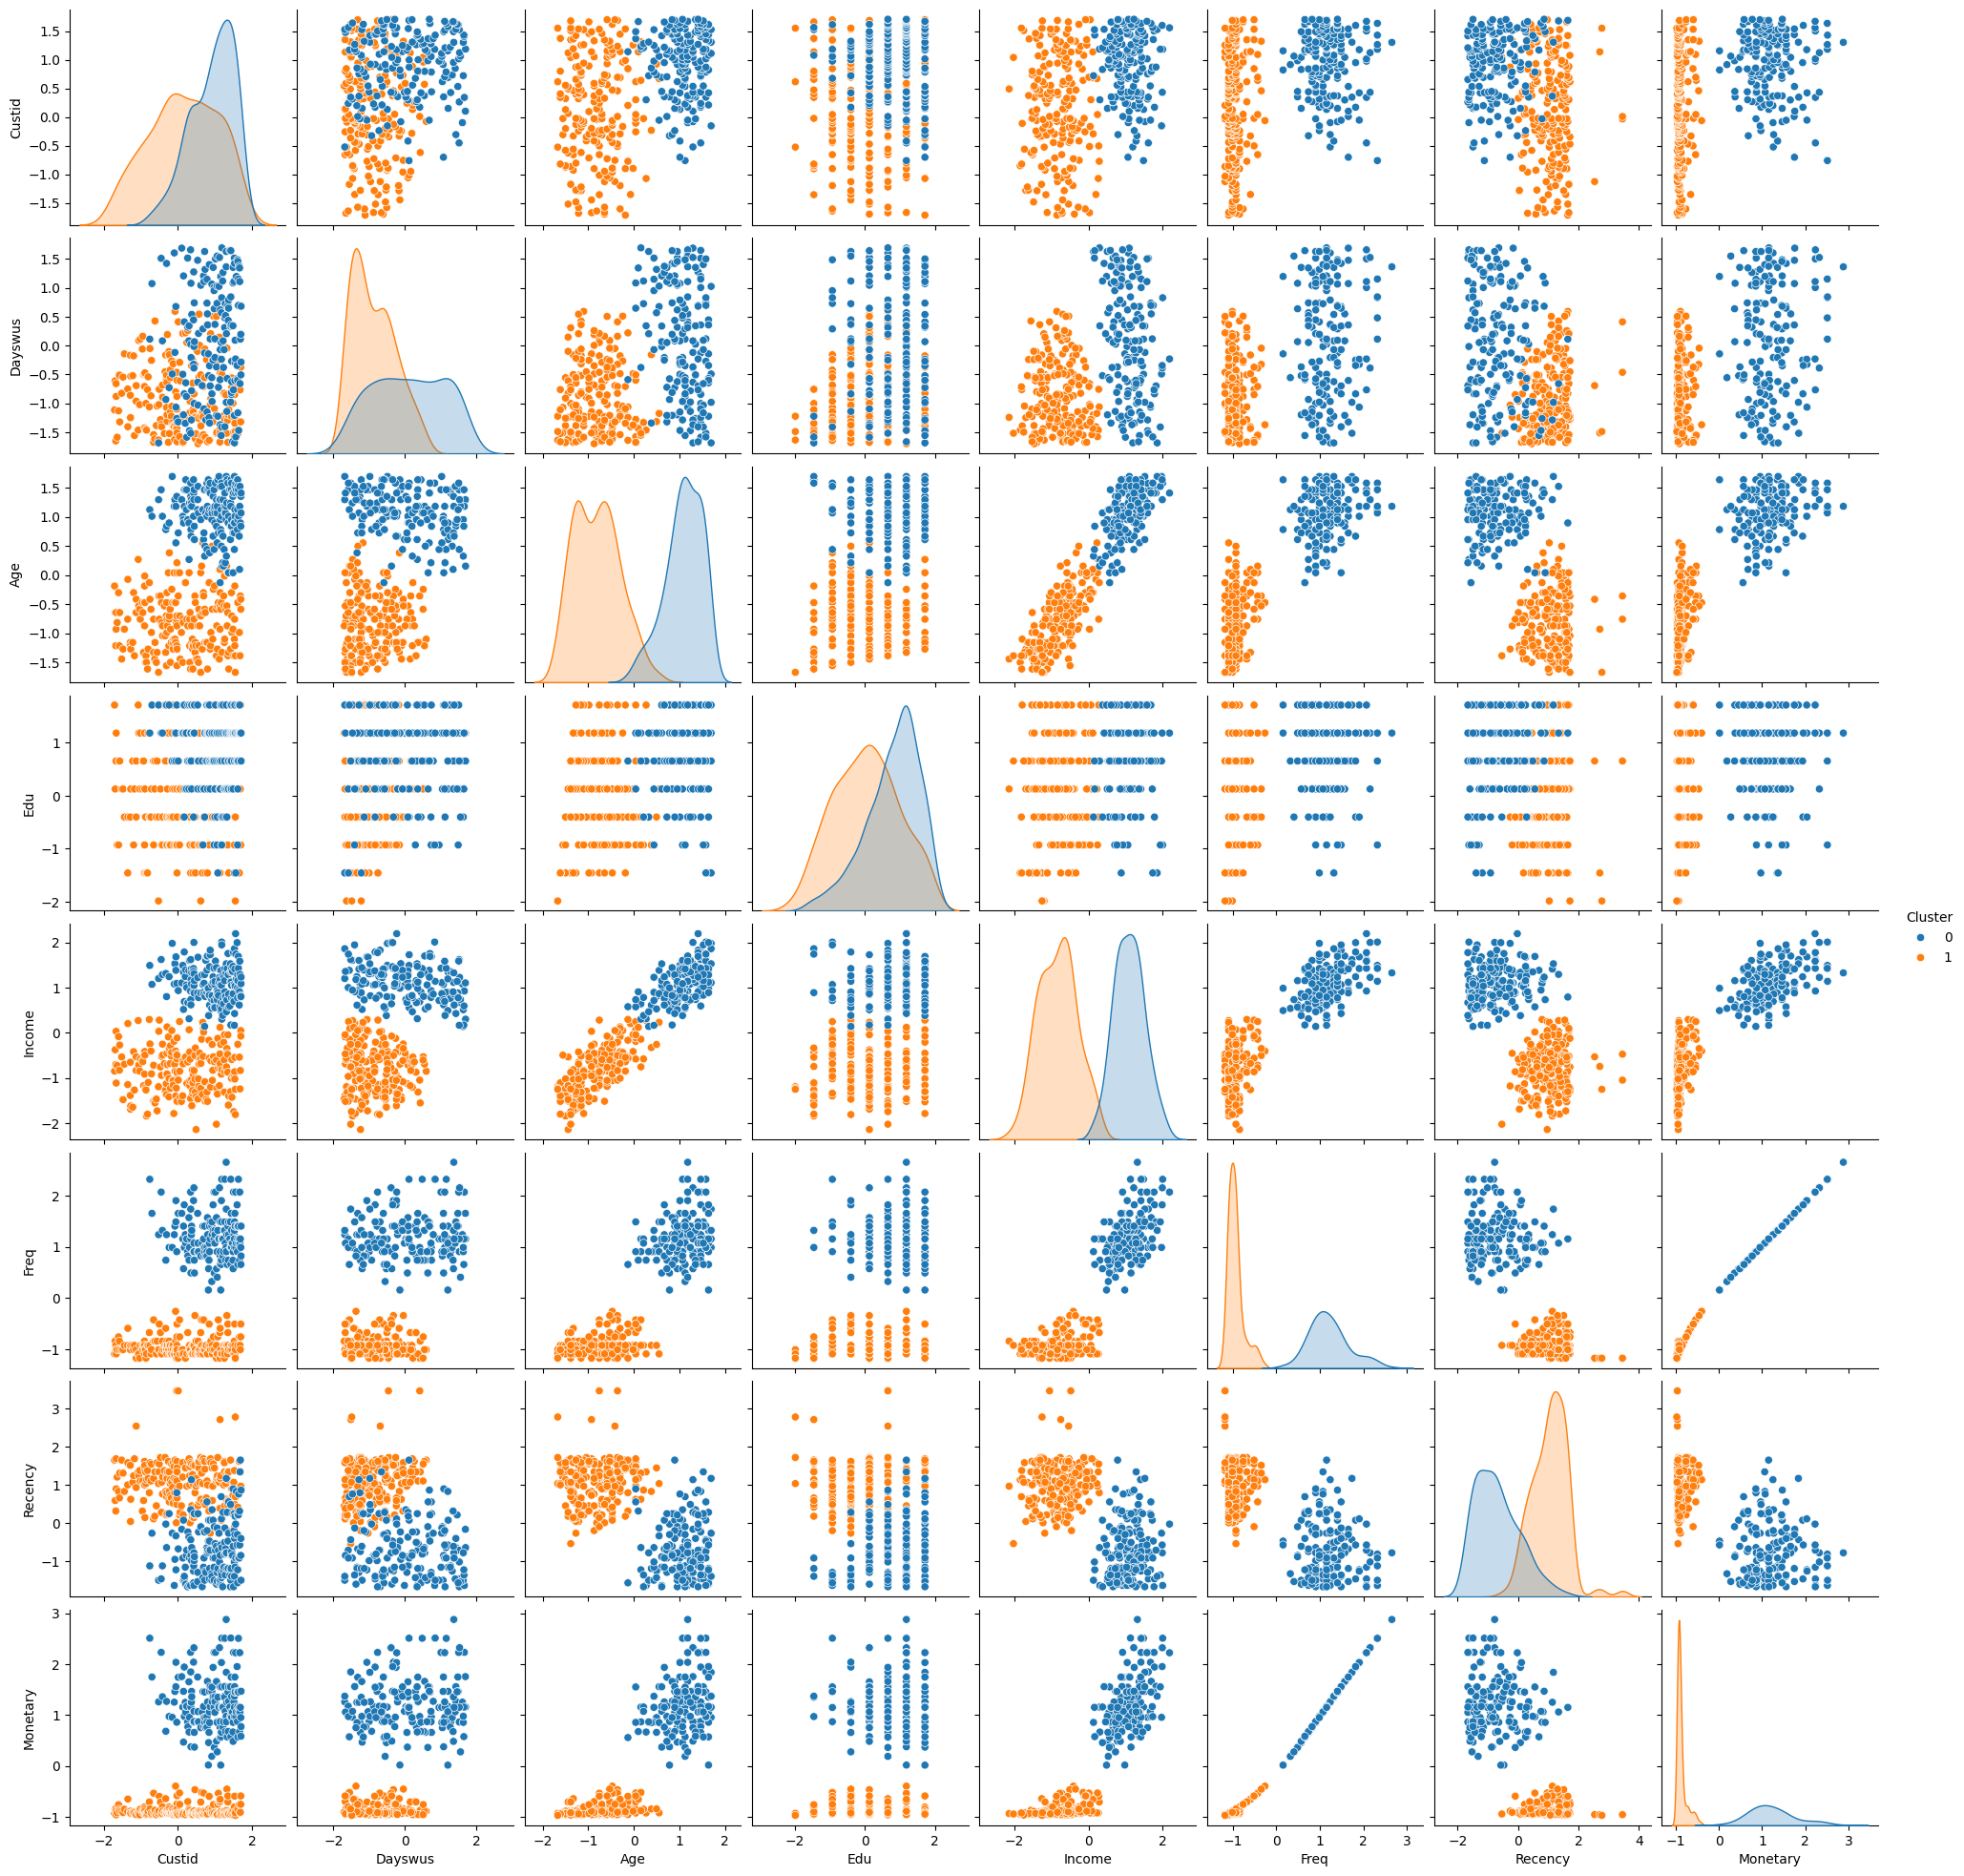

In [40]:
# Separate the customers who bought and did not buy the corkscrew
buyers = selected_features_df[selected_features_df['Cluster'] == 1]
non_buyers = selected_features_df[selected_features_df['Cluster'] == 0]

# Concatenate the buyers and non-buyers DataFrames
combined_df = pd.concat([buyers, non_buyers])

# Plot the pair plot
sns.pairplot(combined_df, hue='Cluster')
plt.show()